In [1]:
import missingno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from utils import *

get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')

In [2]:
df_train = pd.read_csv("../datasets/train_processed.csv", index_col=0)
df_new = df_train.drop(["Next_Tmin", "Next_Tmax"], axis=1)

df_val = pd.read_csv("../datasets/val_processed.csv", index_col=0)
df_val_save = df_val.drop(["Next_Tmin", "Next_Tmax"], axis=1)

df_test = pd.read_csv("../datasets/test_processed.csv", index_col=0)
df_test_save = df_test.drop(["Next_Tmin", "Next_Tmax"], axis=1)

df_train

,station,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC2,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lon,Slope,Solar radiation,Next_Tmin,Next_Tmax
2798,24.0,25.3,53.098980,88.314713,28.838707,22.714764,4.491992,35.357061,0.397159,0.536422,0.217628,0.000000,0.000000,0.000000,126.909,0.2223,4849.283203,22.9,28.9
1429,5.0,30.0,57.957870,88.353050,28.629040,22.664603,5.869879,89.331824,0.218586,0.001589,0.000000,0.000000,0.007546,0.000000,127.135,0.5055,4563.660156,21.5,31.4
4835,11.0,32.6,37.920181,77.275185,33.550047,24.529717,6.451454,71.790871,0.015765,0.278280,0.000000,0.000000,0.000000,0.000000,127.085,0.6233,5795.268066,22.2,33.6
5434,10.0,30.0,66.996681,95.048515,26.293850,23.365634,4.801002,34.452793,0.790333,0.787790,4.833832,2.626041,0.000000,0.029888,126.955,5.1782,5352.822754,22.2,31.1
7260,11.0,31.3,54.651810,80.519485,28.943090,24.040451,6.525222,49.586287,0.356729,0.679298,0.000000,0.000000,0.000000,0.000000,127.085,0.6233,5102.056152,23.8,28.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6980,6.0,33.5,49.282288,84.976288,34.561699,26.705811,5.534268,81.235738,0.229199,0.464349,0.000000,0.000000,0.000000,12.055163,127.042,0.1457,5404.668457,26.7,33.4
5723,24.0,34.8,46.886745,84.179184,34.680169,28.586751,6.206956,57.148986,0.013230,0.010946,0.000000,0.000000,0.000000,0.000000,126.909,0.2223,5047.767578,27.7,35.6
5264,15.0,31.8,51.766171,82.884941,32.157013,27.149286,8.539820,32.274478,0.126622,0.101377,0.006876,0.000000,0.000000,0.000000,126.937,0.8552,5538.563477,25.1,32.1
2835,11.0,24.7,57.398273,93.838325,28.527854,22.080858,6.573750,38.056711,0.278724,0.151631,0.005907,0.000000,0.000000,0.000000,127.085,0.6233,4804.658203,20.6,29.4


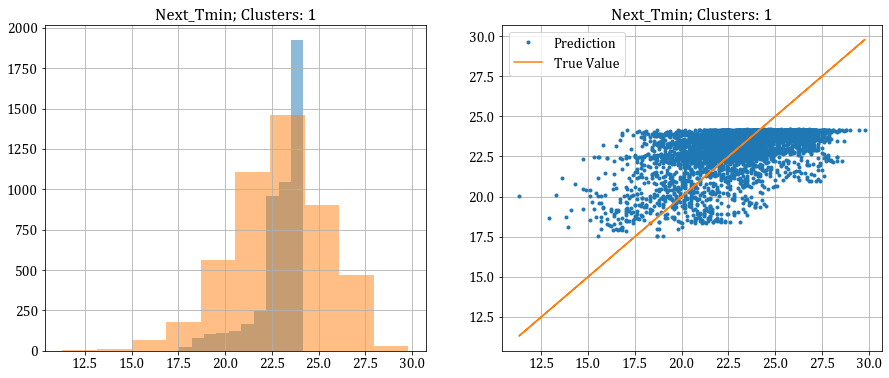

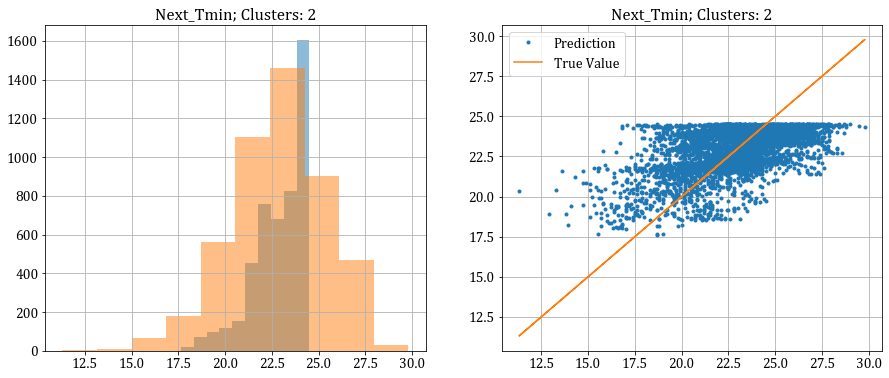

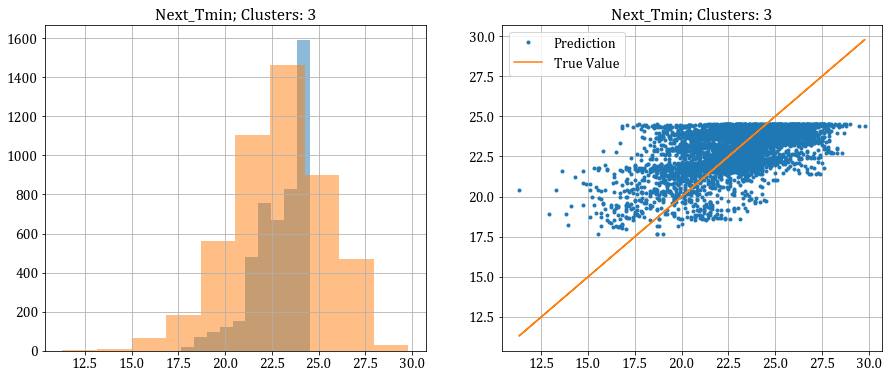

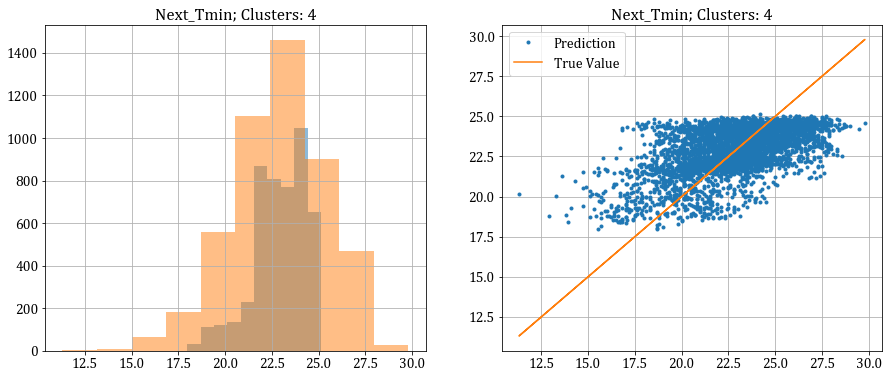

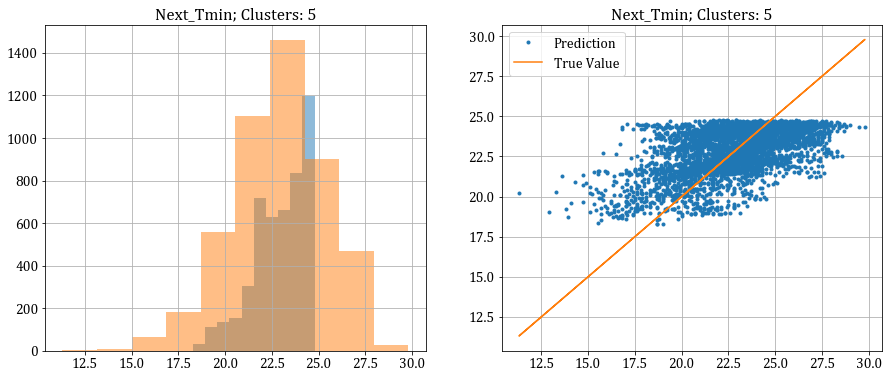

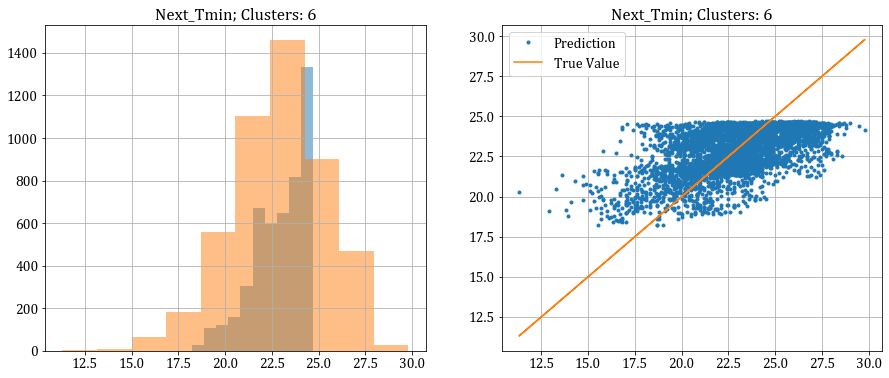

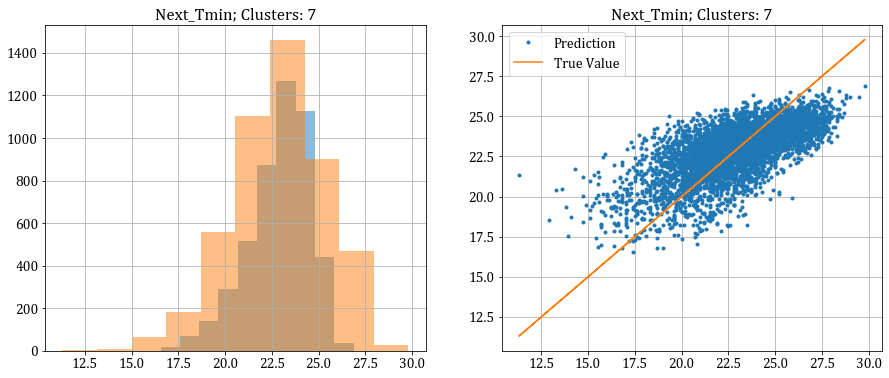

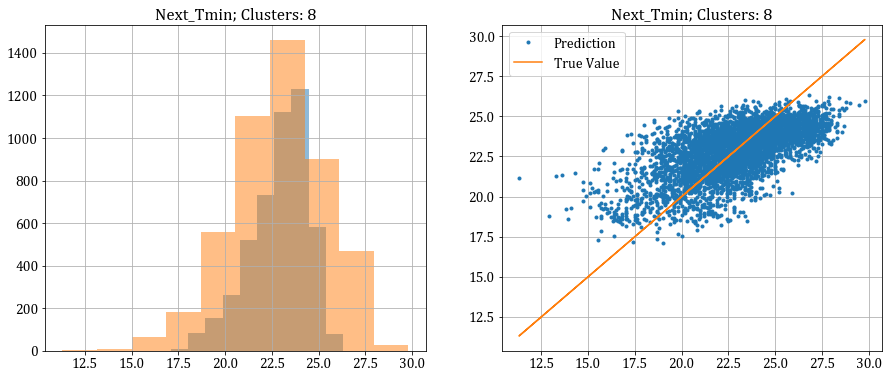

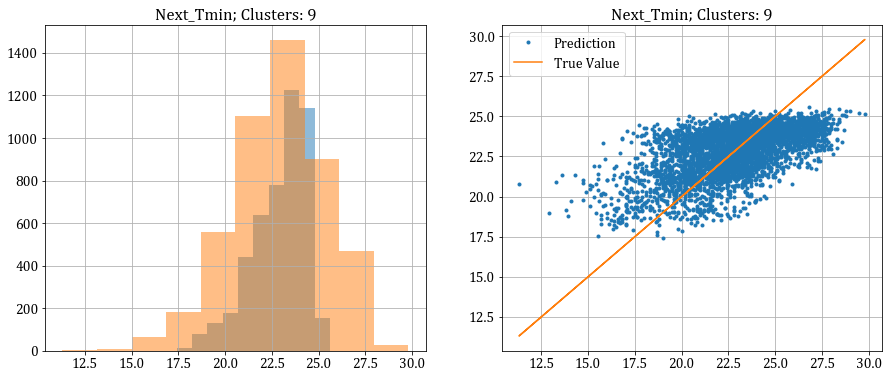

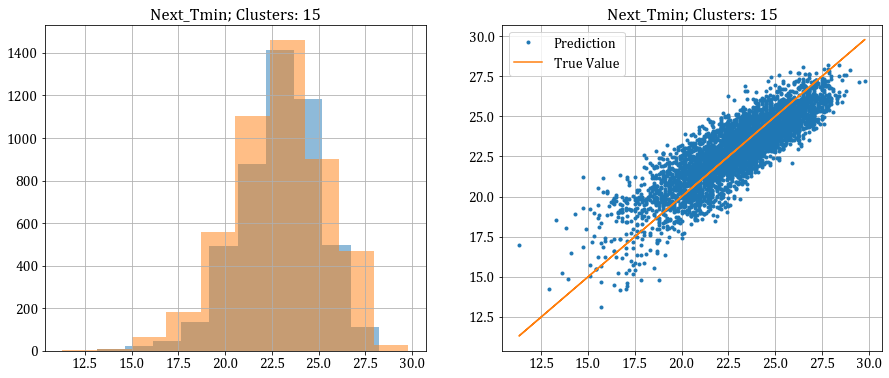

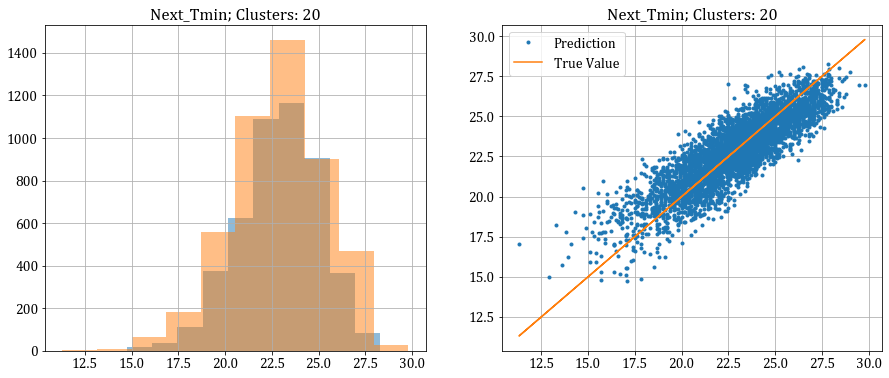

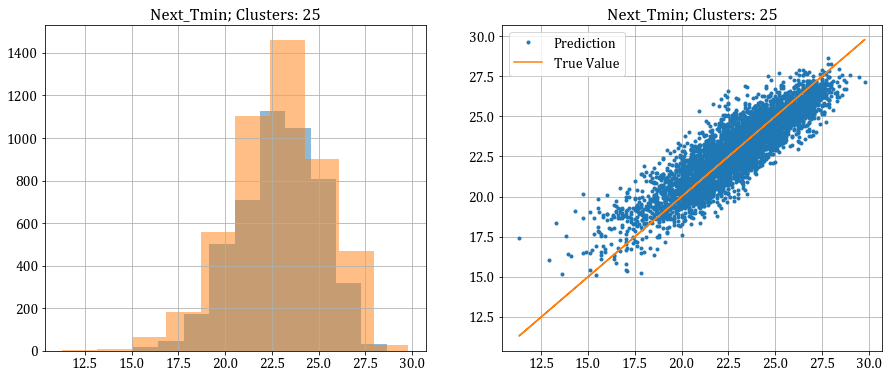

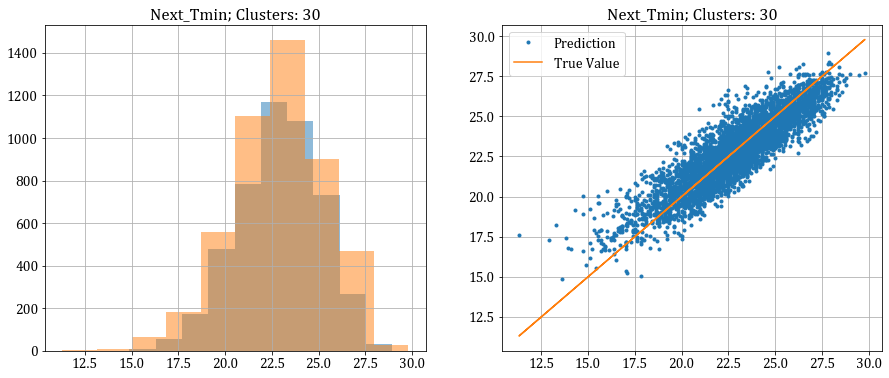

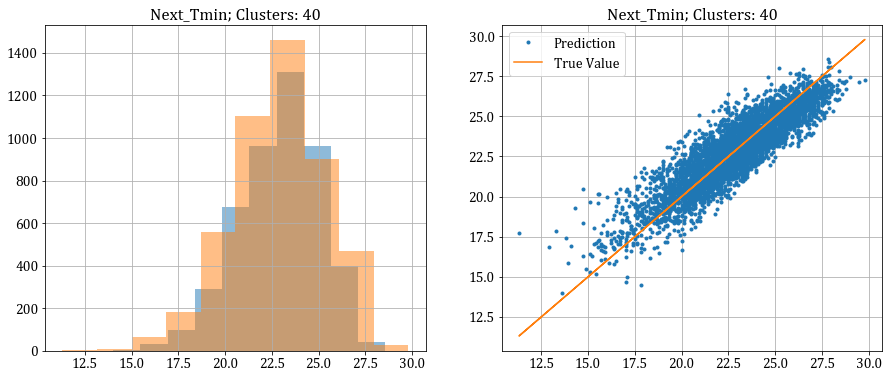

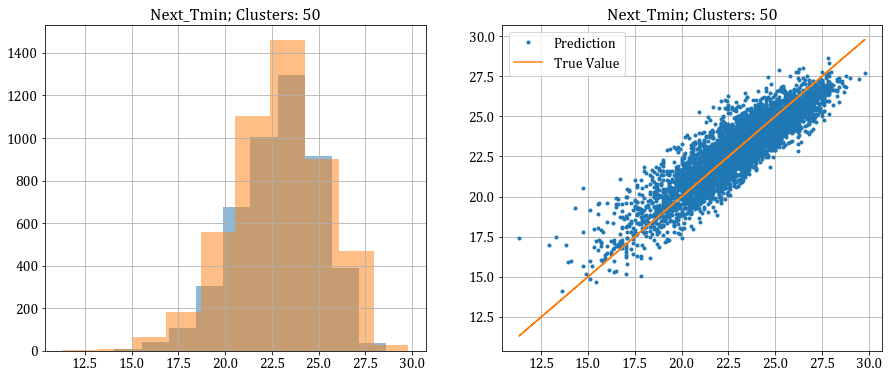

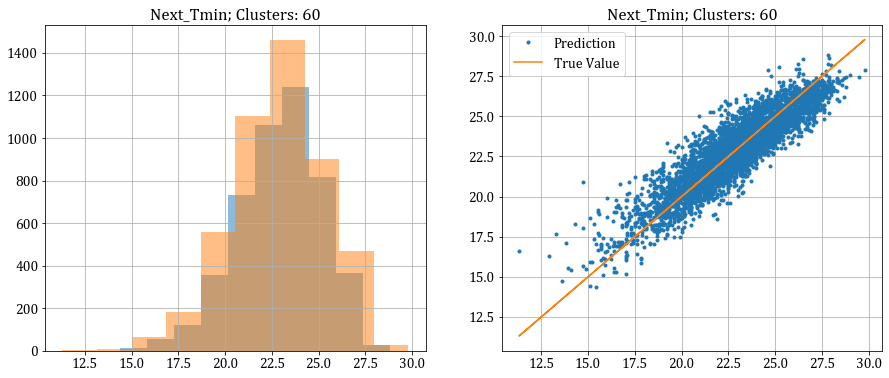

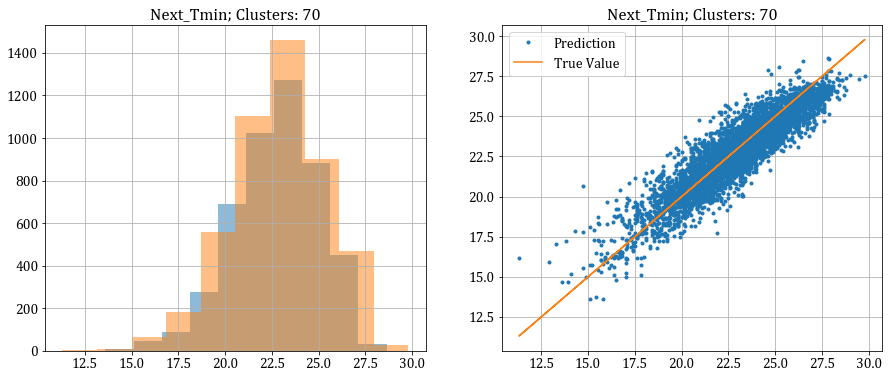

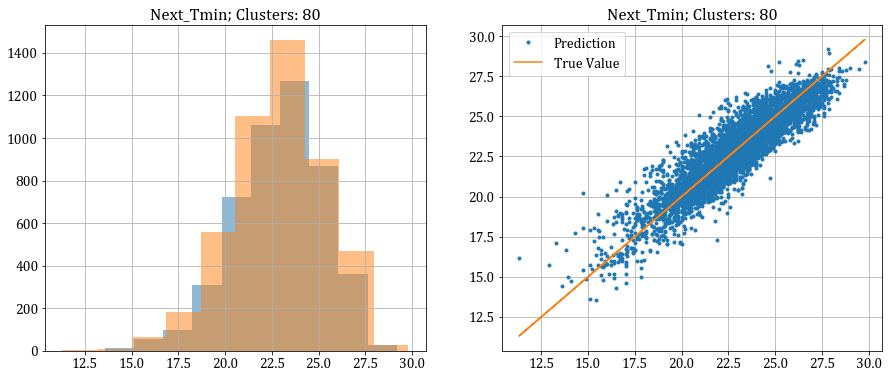

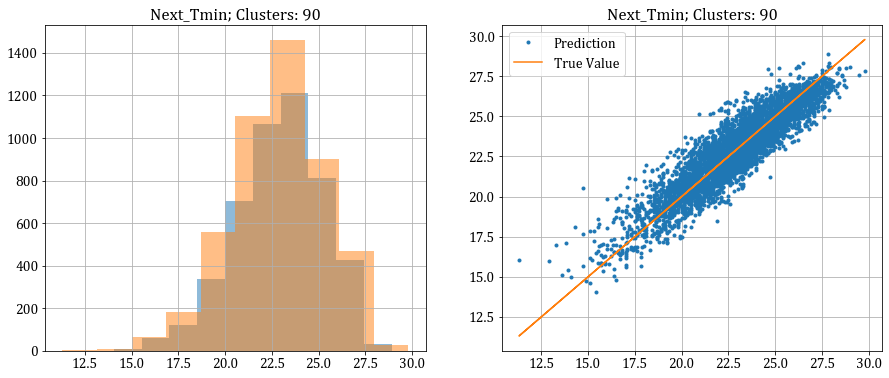

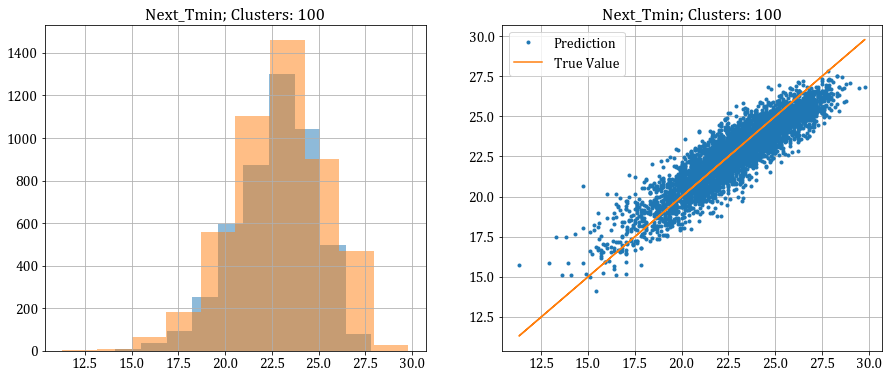

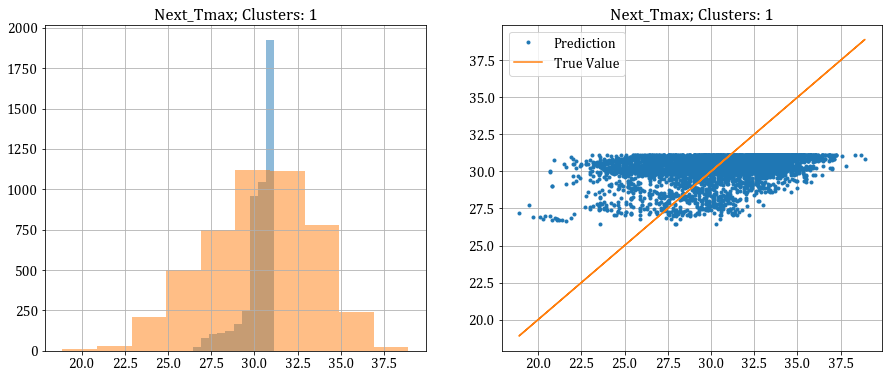

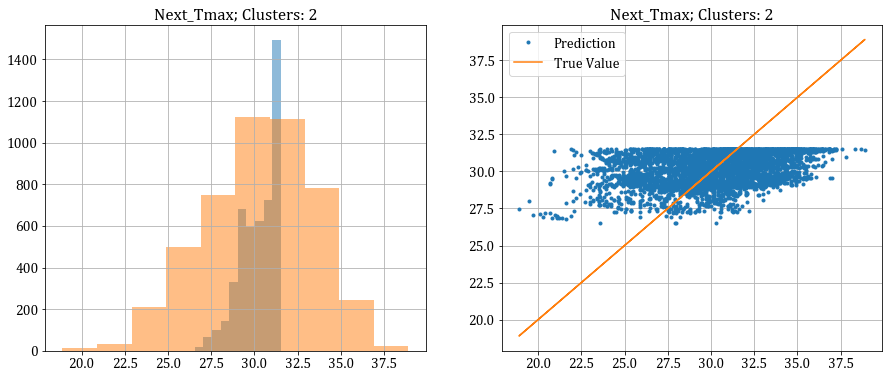

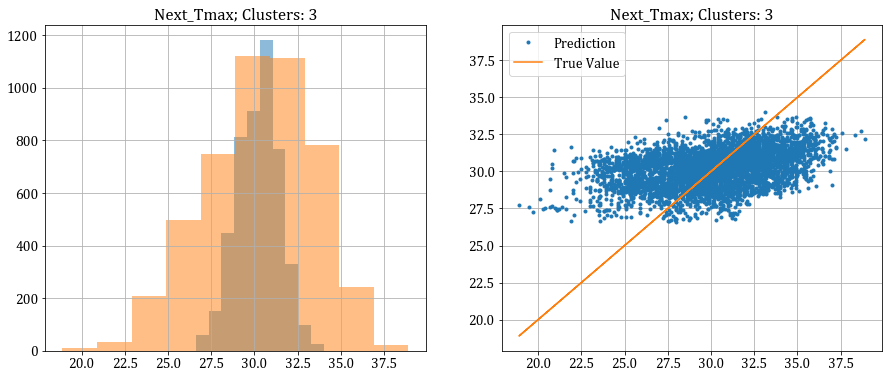

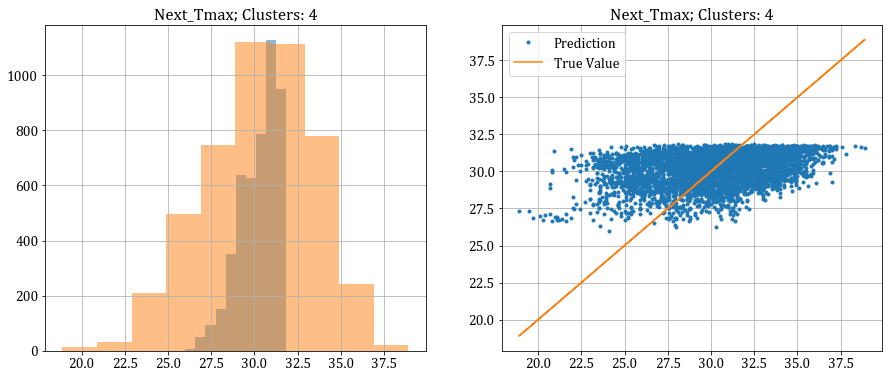

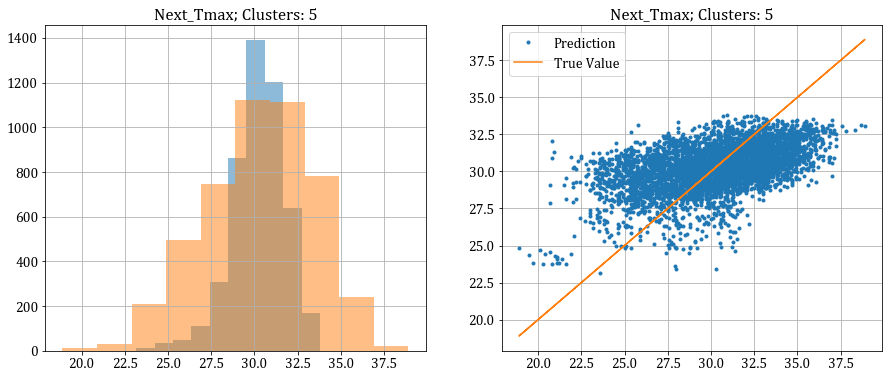

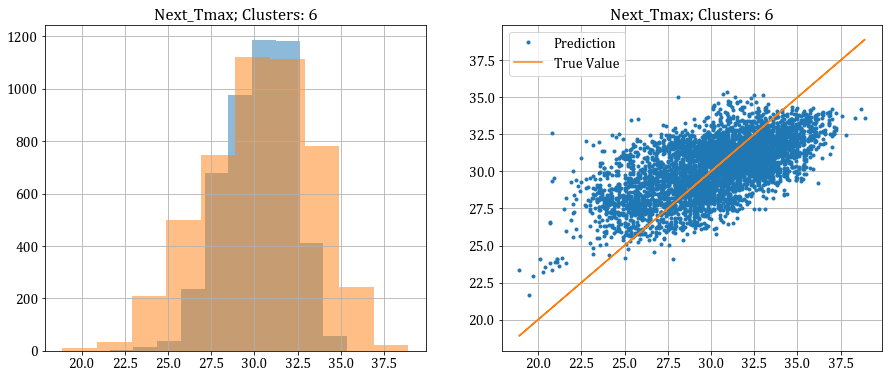

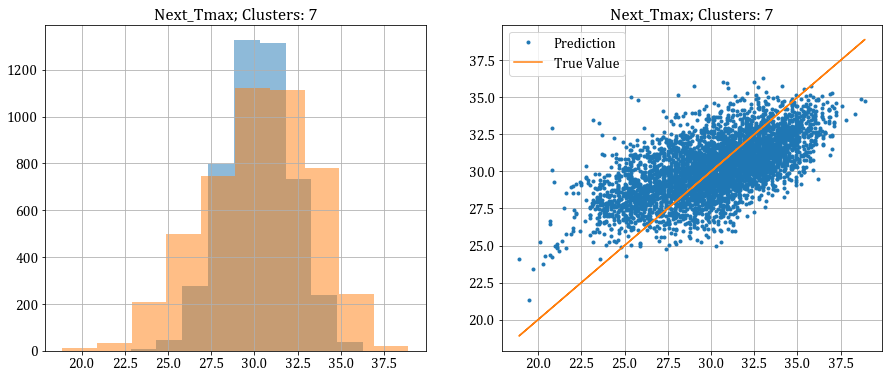

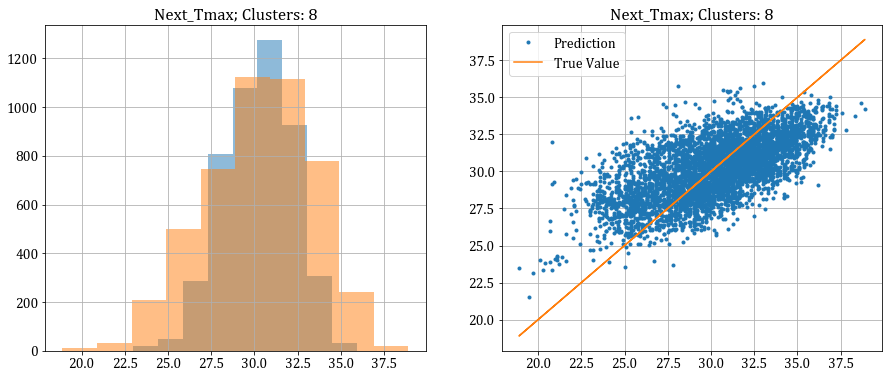

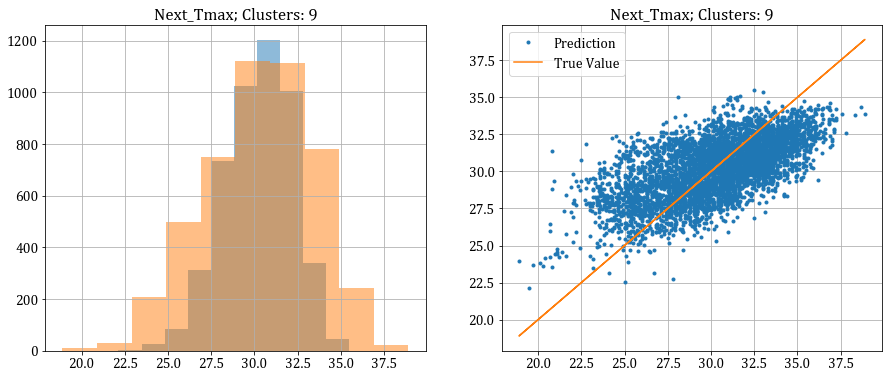

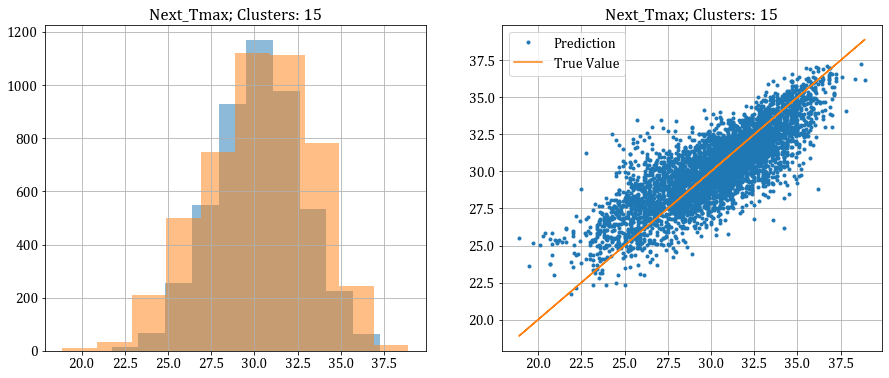

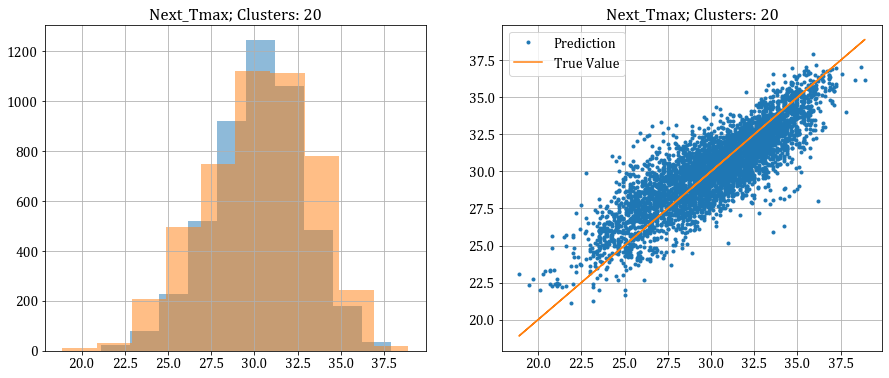

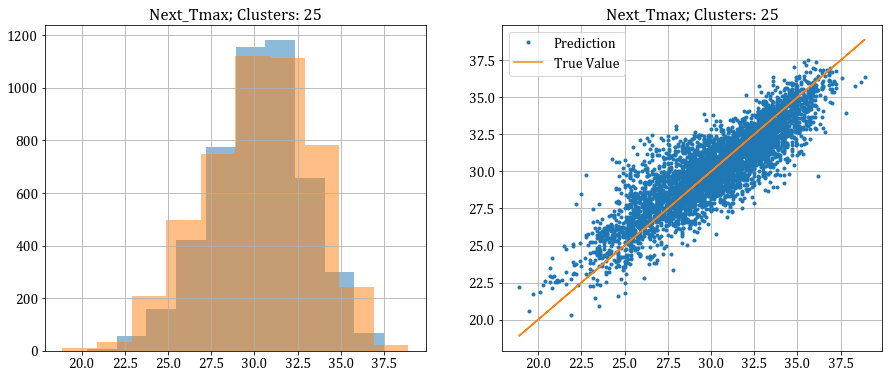

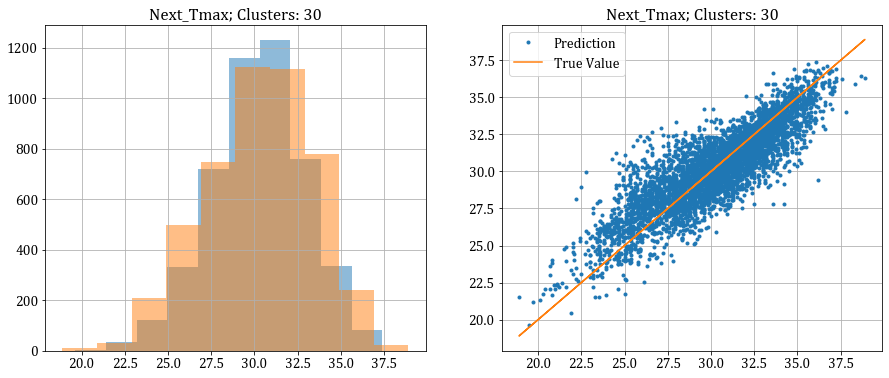

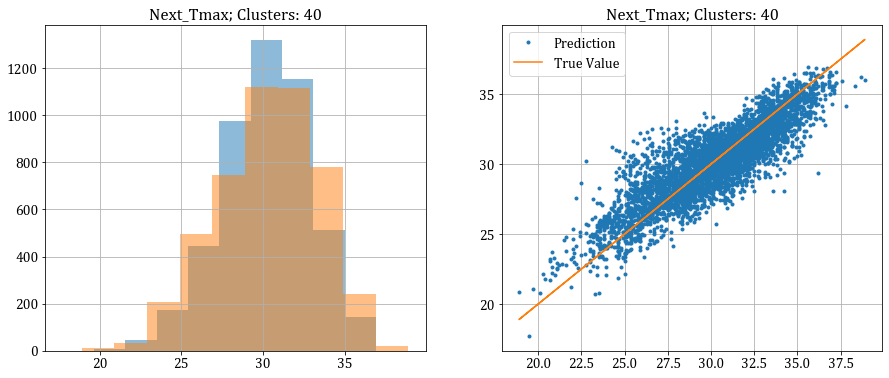

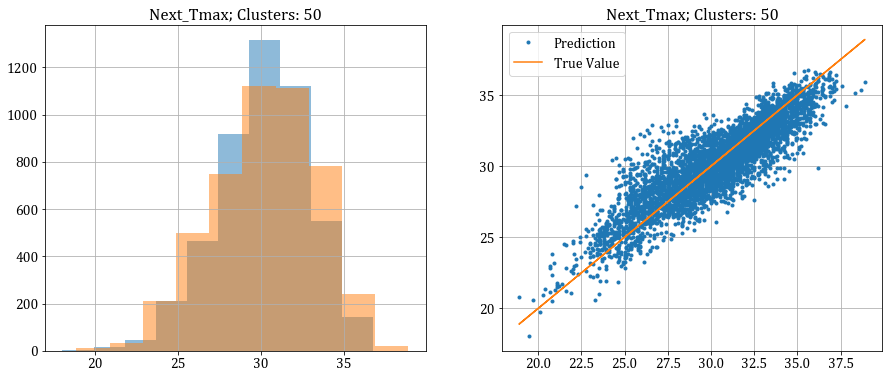

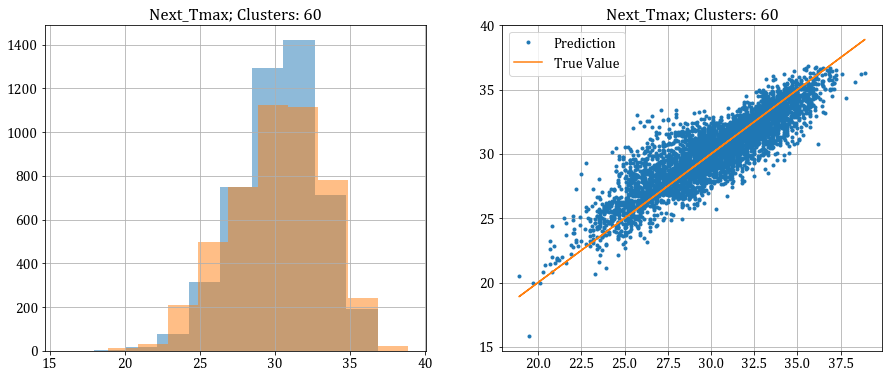

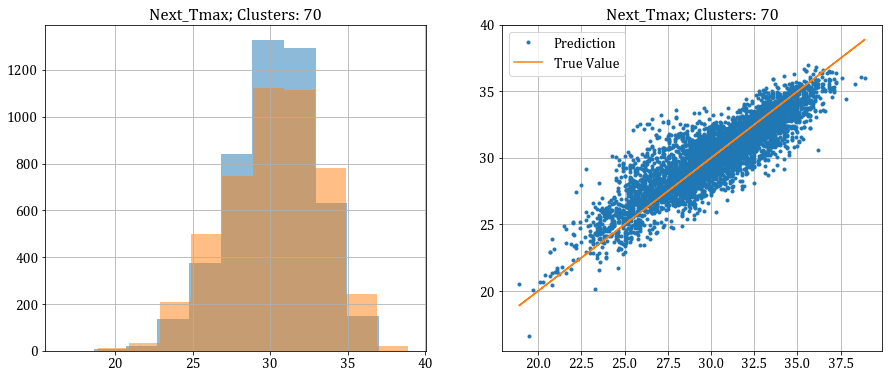

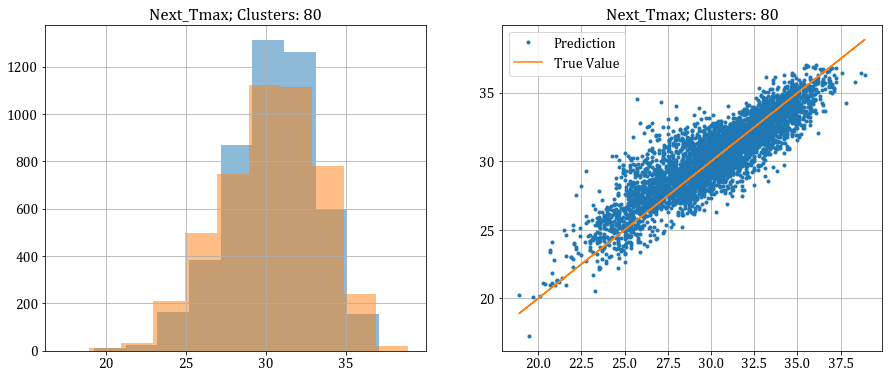

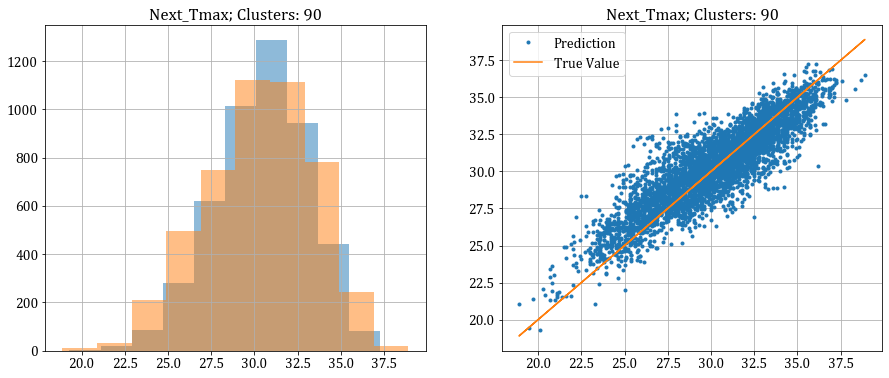

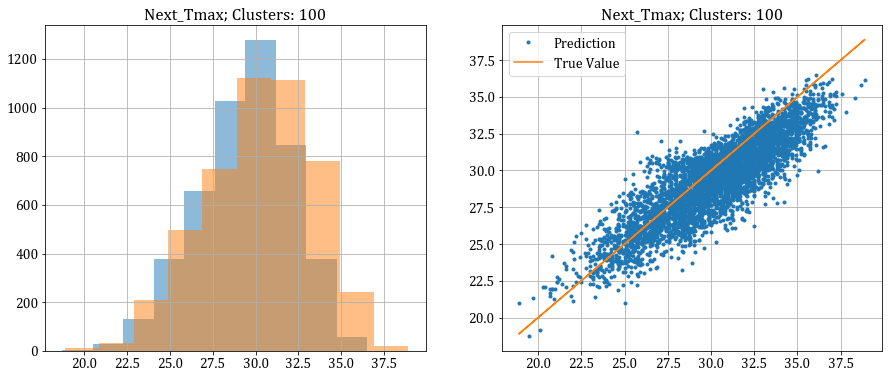

In [3]:
num_clusters = [1]
num_clusters.extend(range(2,10))
num_clusters.extend(range(15, 31, 5))
num_clusters.extend(range(40, 101, 10))

# No regularization
min_sse_list, min_error_list, min_val_error_list, min_kmeans_list, min_label_list, min_cluster_centers_list, min_val_label_list, min_test_error_list, min_test_label_list = gaussian_basis_fit(num_clusters, df_new, df_val_save, df_test_save, df_train, df_val, df_test, lmbda=0, fit_var="T_min")
max_sse_list, max_error_list, max_val_error_list, max_kmeans_list, max_label_list, max_cluster_centers_list, max_val_label_list, max_test_error_list, max_test_label_list = gaussian_basis_fit(num_clusters, df_new, df_val_save, df_test_save, df_train, df_val, df_test, lmbda=0, fit_var="T_max")

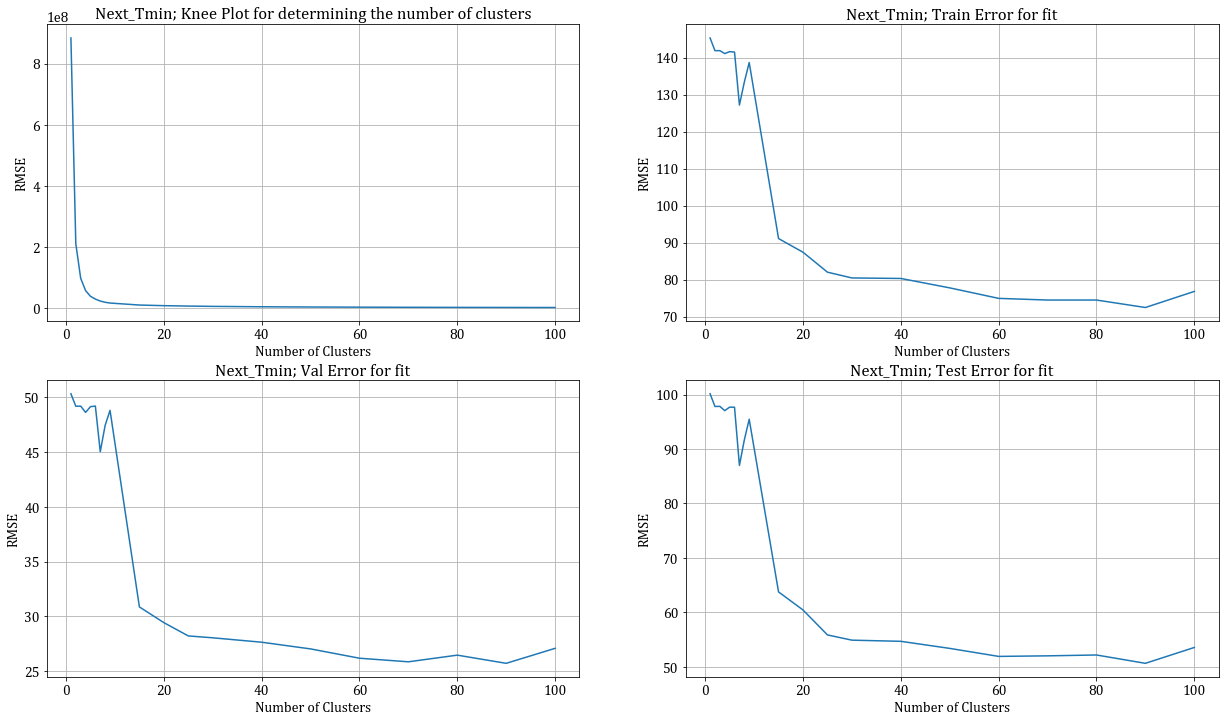

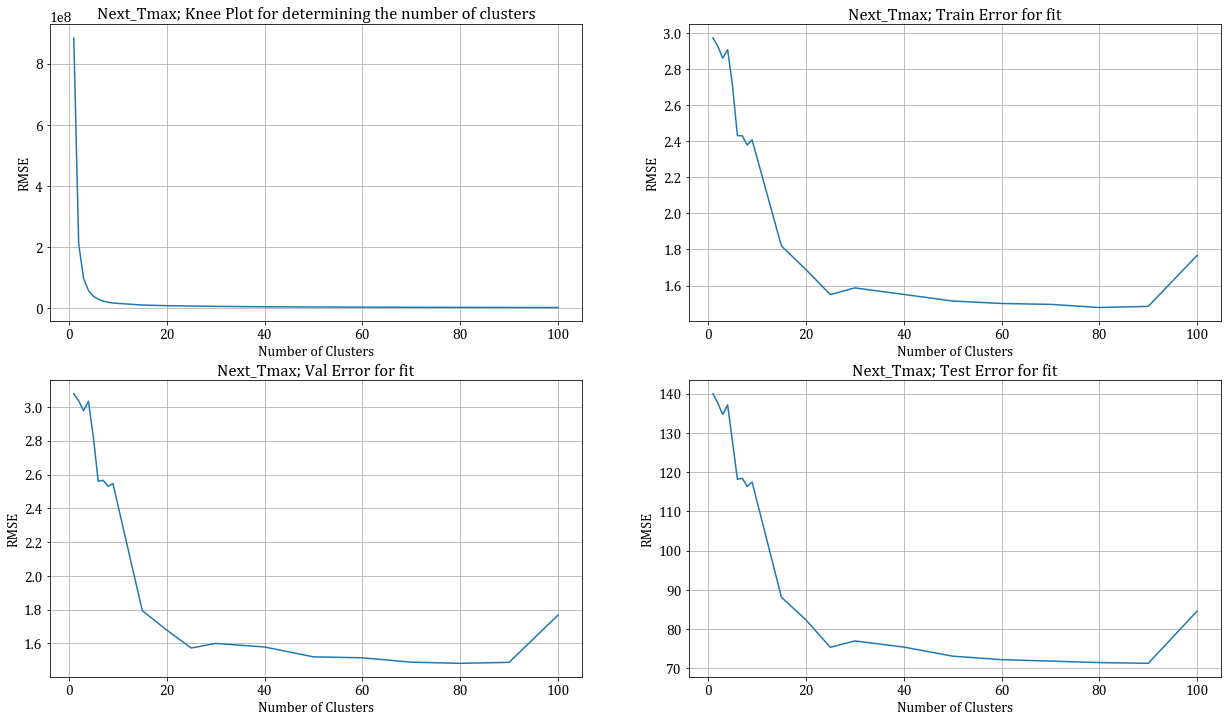

In [4]:
plt.figure(figsize=[21,12])
plt.subplot(2,2,1)
plt.plot(num_clusters, min_sse_list)
plt.xlabel("Number of Clusters")
plt.ylabel("RMSE")
plt.title("Next_Tmin; Knee Plot for determining the number of clusters")
plt.subplot(2,2,2)
plt.plot(num_clusters, min_error_list)
plt.xlabel("Number of Clusters")
plt.ylabel("RMSE")
plt.title("Next_Tmin; Train Error for fit")
plt.subplot(2,2,3)
plt.plot(num_clusters, min_val_error_list)
plt.xlabel("Number of Clusters")
plt.ylabel("RMSE")
plt.title("Next_Tmin; Val Error for fit")
plt.subplot(2,2,4)
plt.plot(num_clusters, min_test_error_list)
plt.xlabel("Number of Clusters")
plt.ylabel("RMSE")
plt.title("Next_Tmin; Test Error for fit")
plt.show()

plt.figure(figsize=[21,12])
plt.subplot(2,2,1)
plt.plot(num_clusters, max_sse_list)
plt.xlabel("Number of Clusters")
plt.ylabel("RMSE")
plt.title("Next_Tmax; Knee Plot for determining the number of clusters")
plt.subplot(2,2,2)
plt.plot(num_clusters, max_error_list)
plt.xlabel("Number of Clusters")
plt.ylabel("RMSE")
plt.title("Next_Tmax; Train Error for fit")
plt.subplot(2,2,3)
plt.plot(num_clusters, max_val_error_list)
plt.xlabel("Number of Clusters")
plt.ylabel("RMSE")
plt.title("Next_Tmax; Val Error for fit")
plt.subplot(2,2,4)
plt.plot(num_clusters, max_test_error_list)
plt.xlabel("Number of Clusters")
plt.ylabel("RMSE")
plt.title(("Next_Tmax; Test Error for fit"))
plt.show()

In [5]:
min_error_list = np.array(min_error_list)
min_val_error_list = np.array(min_val_error_list)
min_df_error = pd.DataFrame({"Clusters":num_clusters, "Error":min_error_list, "Validation Error":min_val_error_list, "Test Error":min_test_error_list})
min_df_error.sort_values(by=["Validation Error"], ascending=True, inplace=True)
min_df_error.to_csv("../datasets/t3_d3_no_reg_min.csv")
display(min_df_error)

max_error_list = np.array(max_error_list)
max_val_error_list = np.array(max_val_error_list)
max_df_error = pd.DataFrame({"Clusters":num_clusters, "Error":max_error_list, "Validation Error":max_val_error_list, "Test Error":max_test_error_list})
max_df_error.sort_values(by=["Validation Error"], ascending=True, inplace=True)
max_df_error.to_csv("../datasets/t3_d3_no_reg_max.csv")
display(max_df_error)


,Clusters,Error,Validation Error,Test Error
18,90,72.454975,25.706840,50.639771
16,70,74.472883,25.845964,52.014410
15,60,74.925217,26.172211,51.910576
17,80,74.475866,26.454038,52.170914
14,50,77.764561,27.023553,53.381636
19,100,76.803801,27.077058,53.550259
13,40,80.308748,27.634861,54.681650
12,30,80.446856,28.038263,54.894517
11,25,82.007776,28.209815,55.856865
10,20,87.401434,29.425208,60.438255


,Clusters,Error,Validation Error,Test Error
17,80,1.478647,1.482350,71.493955
18,90,1.484803,1.488044,71.310959
16,70,1.496068,1.489095,71.879276
15,60,1.500970,1.515034,72.244815
14,50,1.514694,1.520565,73.138852
11,25,1.550081,1.572710,75.382118
13,40,1.551164,1.579063,75.448106
12,30,1.587339,1.600123,77.004715
10,20,1.689120,1.679328,82.395169
19,100,1.767540,1.767705,84.618335


90.0 (90, 17)


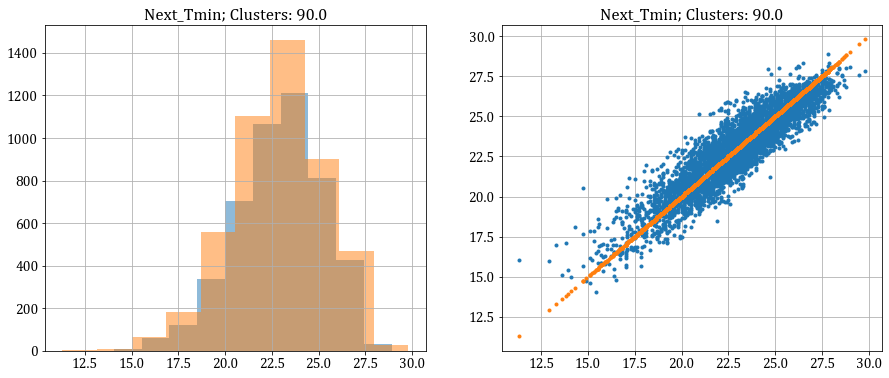

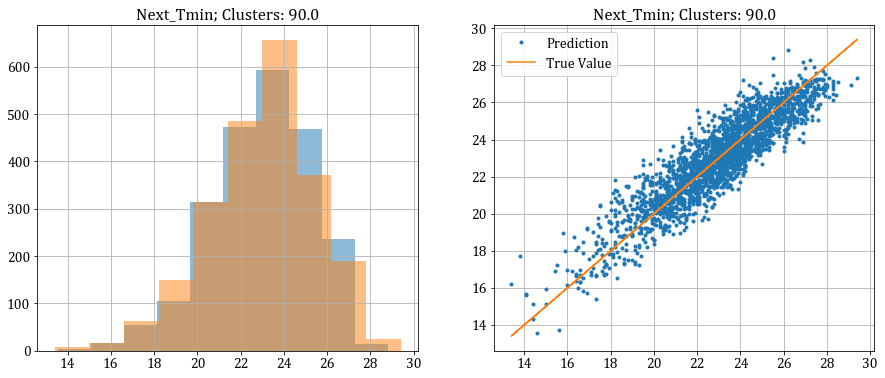

Test RMSE: 1.0612317092745545


In [6]:
min_best_cluster = min_df_error.iloc[0]["Clusters"]
pos = num_clusters.index(min_best_cluster)
min_best_centers = min_cluster_centers_list[pos]
min_best_centers.shape

print(min_best_cluster, min_best_centers.shape)

kmeans = min_kmeans_list[pos]
min_best_centers = min_cluster_centers_list[pos]
corresponding_center = min_best_centers[min_label_list[pos],:]

X = df_new.to_numpy()
X_val = df_val_save.to_numpy()
X_test = df_test_save.to_numpy()
val_labels = min_val_label_list[pos]
test_labels = kmeans.predict(X_test)

distance = np.linalg.norm(X-corresponding_center, axis=1)
var = np.var(distance)*distance.size

phi = np.ones((X.shape[0], 1))
phi_val = np.ones((X_val.shape[0], 1))
phi_test = np.ones((X_test.shape[0], 1))

for i in range(int(min_best_cluster)):
    A = X-min_best_centers[i,:]
    A = np.exp(-np.linalg.norm(X-min_best_centers[i,:], axis=1)**2/var)

    B = X_val-min_best_centers[i,:]
    B = np.exp(-np.linalg.norm(X_val-min_best_centers[i,:], axis=1)**2/var)
    
    c = X_test-min_best_centers[i,:]
    c = np.exp(-np.linalg.norm(X_test-min_best_centers[i,:], axis=1)**2/var)

    phi = np.append(phi, np.exp(-np.linalg.norm(X-min_best_centers[i,:], axis=1)**2/var).reshape(-1,1), axis=1)
    phi_val = np.append(phi_val, np.exp(-np.linalg.norm(X_val-min_best_centers[i,:], axis=1)**2/var).reshape(-1,1), axis=1)
    phi_test = np.append(phi_test, np.exp(-np.linalg.norm(X_test-min_best_centers[i,:], axis=1)**2/var).reshape(-1,1), axis=1)

lmbda = 0
W1 = (np.linalg.inv(phi.T @ phi + lmbda*np.identity(phi.shape[1])) @ phi.T) @ df_train["Next_Tmin"]
W1 = W1.reshape(-1,1)
pred = phi @ W1
val_pred = phi_val @ W1
test_pred = phi_test @ W1

plt.figure(figsize=[15,6])
plt.title("Next_Tmin; Clusters: "+str(min_best_cluster))
plt.subplot(1, 2, 1)
plt.hist(pred, alpha=0.5)
plt.hist(df_train["Next_Tmin"], alpha=0.5)
plt.title("Next_Tmin; Clusters: "+str(min_best_cluster))
plt.subplot(1, 2, 2)
plt.plot(df_train["Next_Tmin"], pred, ".")
plt.plot(df_train["Next_Tmin"], df_train["Next_Tmin"], '.')
plt.title("Next_Tmin; Clusters: "+str(min_best_cluster))
plt.show()

plt.figure(figsize=[15,6])
plt.title("Next_Tmin; Clusters: "+str(min_best_cluster))
plt.subplot(1, 2, 1)
plt.hist(test_pred, alpha=0.5)
plt.hist(df_test["Next_Tmin"], alpha=0.5)
plt.title("Next_Tmin; Clusters: "+str(min_best_cluster))
plt.subplot(1, 2, 2)
plt.plot(df_test["Next_Tmin"], test_pred, ".", label="Prediction")
plt.plot(df_test["Next_Tmin"], df_test["Next_Tmin"], label="True Value")
plt.title("Next_Tmin; Clusters: "+str(min_best_cluster))
plt.legend()

plt.show()

test_error = np.linalg.norm(df_test["Next_Tmin"].to_numpy().reshape(-1,1)-test_pred)/(test_pred.size)**0.5
print("Test RMSE:", test_error)


80.0 (80, 17)


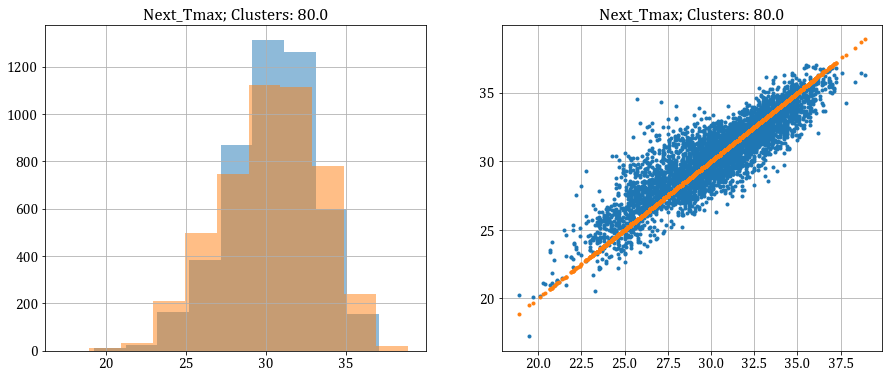

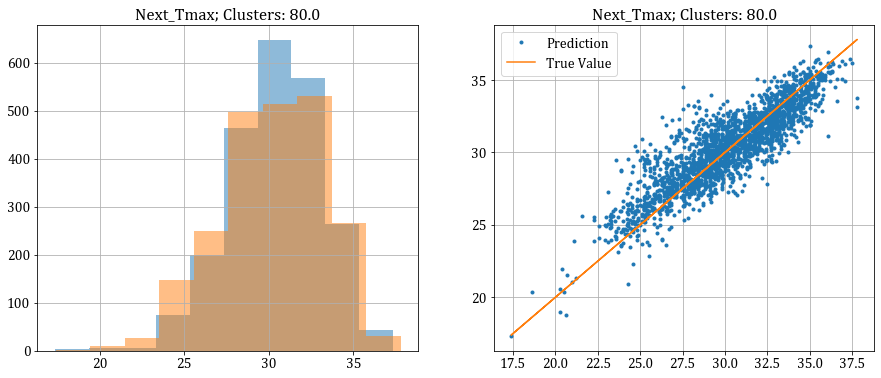

Test RMSE: 1.4982621391957776


In [7]:
max_best_cluster = max_df_error.iloc[0]["Clusters"]
pos = num_clusters.index(max_best_cluster)
max_best_centers = max_cluster_centers_list[pos]
max_best_centers.shape

print(max_best_cluster, max_best_centers.shape)

kmeans = max_kmeans_list[pos]
max_best_centers = max_cluster_centers_list[pos]
corresponding_center = max_best_centers[max_label_list[pos],:]

X = df_new.to_numpy()
X_val = df_val_save.to_numpy()
X_test = df_test_save.to_numpy()
val_labels = max_val_label_list[pos]
test_labels = kmeans.predict(X_test)

distance = np.linalg.norm(X-corresponding_center, axis=1)
var = np.var(distance)*distance.size

phi = np.ones((X.shape[0], 1))
phi_val = np.ones((X_val.shape[0], 1))
phi_test = np.ones((X_test.shape[0], 1))

for i in range(int(max_best_cluster)):
    A = X-max_best_centers[i,:]
    A = np.exp(-np.linalg.norm(X-max_best_centers[i,:], axis=1)**2/var)

    B = X_val-max_best_centers[i,:]
    B = np.exp(-np.linalg.norm(X_val-max_best_centers[i,:], axis=1)**2/var)
    
    c = X_test-max_best_centers[i,:]
    c = np.exp(-np.linalg.norm(X_test-max_best_centers[i,:], axis=1)**2/var)

    phi = np.append(phi, np.exp(-np.linalg.norm(X-max_best_centers[i,:], axis=1)**2/var).reshape(-1,1), axis=1)
    phi_val = np.append(phi_val, np.exp(-np.linalg.norm(X_val-max_best_centers[i,:], axis=1)**2/var).reshape(-1,1), axis=1)
    phi_test = np.append(phi_test, np.exp(-np.linalg.norm(X_test-max_best_centers[i,:], axis=1)**2/var).reshape(-1,1), axis=1)

lmbda = 0
W1 = (np.linalg.inv(phi.T @ phi + lmbda*np.identity(phi.shape[1])) @ phi.T) @ df_train["Next_Tmax"]
W1 = W1.reshape(-1,1)
pred = phi @ W1
val_pred = phi_val @ W1
test_pred = phi_test @ W1

plt.figure(figsize=[15,6])
plt.title("Next_Tmax; Clusters: "+str(max_best_cluster))
plt.subplot(1, 2, 1)
plt.hist(pred, alpha=0.5)
plt.hist(df_train["Next_Tmax"], alpha=0.5)
plt.title("Next_Tmax; Clusters: "+str(max_best_cluster))
plt.subplot(1, 2, 2)
plt.plot(df_train["Next_Tmax"], pred, ".")
plt.plot(df_train["Next_Tmax"], df_train["Next_Tmax"], '.')
plt.title("Next_Tmax; Clusters: "+str(max_best_cluster))
plt.show()

plt.figure(figsize=[15,6])
plt.title("Next_Tmax; Clusters: "+str(max_best_cluster))
plt.subplot(1, 2, 1)

plt.hist(test_pred, alpha=0.5)
plt.hist(df_test["Next_Tmax"], alpha=0.5)
plt.title("Next_Tmax; Clusters: "+str(max_best_cluster))
plt.subplot(1, 2, 2)
plt.plot(df_test["Next_Tmax"], test_pred, ".", label="Prediction")
plt.plot(df_test["Next_Tmax"], df_test["Next_Tmax"], label="True Value")
plt.title("Next_Tmax; Clusters: "+str(max_best_cluster))
plt.legend()
plt.show()

test_error = np.linalg.norm(df_test["Next_Tmax"].to_numpy().reshape(-1,1)-test_pred)/(test_pred.size)**0.5


print("Test RMSE:", test_error)

In [8]:
min_error_list = np.array(min_error_list)
min_val_error_list = np.array(min_val_error_list)
min_df_error = pd.DataFrame({"Clusters":num_clusters, "Error":min_error_list, "Validation Error":min_val_error_list, "Test Error":min_test_error_list})
min_df_error["Error"] = min_df_error["Error"]/(pred.size)**0.5

min_df_error["Validation Error"] = min_df_error["Validation Error"]/(val_pred.size)**0.5
min_df_error["Test Error"] = min_df_error["Test Error"]/(test_pred.size)**0.5
min_df_error.sort_values(by=["Validation Error"], ascending=True, inplace=True)
min_df_error.to_csv("../datasets/t3_d3_no_reg_min.csv")
display(min_df_error)

max_error_list = np.array(max_error_list)
max_val_error_list = np.array(max_val_error_list)
max_df_error = pd.DataFrame({"Clusters":num_clusters, "Error":max_error_list, "Validation Error":max_val_error_list, "Test Error":max_test_error_list})
max_df_error["Test Error"] = max_df_error["Test Error"]/(test_pred.size)**0.5
max_df_error.sort_values(by=["Validation Error"], ascending=True, inplace=True)
max_df_error.to_csv("../datasets/t3_d3_no_reg_max.csv")
display(max_df_error)

,Clusters,Error,Validation Error,Test Error
18,90,1.048093,1.114533,1.061232
16,70,1.077283,1.120565,1.090039
15,60,1.083826,1.134709,1.087863
17,80,1.077326,1.146928,1.093319
14,50,1.124898,1.171620,1.118692
19,100,1.111000,1.173939,1.122225
13,40,1.161701,1.198123,1.145935
12,30,1.163699,1.215613,1.150396
11,25,1.186278,1.223051,1.170564
10,20,1.264300,1.275745,1.266574


,Clusters,Error,Validation Error,Test Error
17,80,1.478647,1.482350,1.498262
18,90,1.484803,1.488044,1.494427
16,70,1.496068,1.489095,1.506337
15,60,1.500970,1.515034,1.513998
14,50,1.514694,1.520565,1.532733
11,25,1.550081,1.572710,1.579744
13,40,1.551164,1.579063,1.581127
12,30,1.587339,1.600123,1.613748
10,20,1.689120,1.679328,1.726713
19,100,1.767540,1.767705,1.773303
